<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Qubit by Qubit</h1>
<h2 style="text-align: center;">Introduction to Quantum Computing</h1>
<h3>Week 8 - Random Bit Generator in Qiskit</h3>
<h3>Lab notebook</h3>

</div>

## Coding cheat sheet:

Defining a quantum circuit: 

`qc = QuantumCircuit(1)` # Define a 1 qubit quantum circuit <br>
`qc = QuantumCircuit(1,1)` # Define a 1 qubit quantum circuit with 1 classical bit (Only for QASM simulator or real Quantum Computer) <br>

`qc.x(0)` # Add an X gate <br>
`qc.h(0)` # Add an H gate <br>
`qc.z(0)` # Add a Z gate <br>

`qc.measure(0,0)` # Add measurement to circuit (Only for QASM simulator or real Quantum Computer) <br>

`qc.draw()` #Draw the circuit <br>


Set up and run the statevector simulator:<br>

`backend = Aer.get_backend('statevector_simulator')` # Tell it which simulator you want to use <br>
`job = execute(qc,backend)` # Put in the name of your quantum circuit where it says qc<br>
`result = job.result()` <br>

Set up and run the QASM simulator:<br>

`backend = Aer.get_backend('qasm_simulator')` # Tell it which simulator you want to use <br>
`job = execute(qc,backend, shots = 1024)` # Put in the name of your quantum circuit where it says qc, and the number of shots you want to use<br>
`result = job.result()` <br>


See the output in vector form (only for Statevector simulator):<br>
`state = result.get_statevector()` <br>
`array_to_latex(state, pretext="\\text{Statevector} = ")` <br>

See the output in histogram form (for Statevector, QASM, or real quantum computer): <br>
`counts = result.get_counts()` <br>
`plot_histogram(counts)` <br>


In [6]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit  #Importing the QuantumCircuit function from Qiskit. We will use this to create our quantum circuits!

# We will use these functions to run our circuit and visualize its final state
from qiskit import Aer, execute, IBMQ 
from qiskit.visualization import *


import warnings  # We are using this library to suppress some warning messages
warnings.filterwarnings("ignore")

provider = IBMQ.load_account()
print("Libraries imported successfully!")

ibmqfactory.load_account:WARNING:2021-11-20 18:34:03,470: Credentials are already in use. The existing account in the session will be replaced.


Libraries imported successfully!


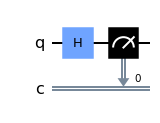

In [7]:
# Block 1- Create a quantum circuit with 1 qubit. Add an H gate to your circuit. Add a measurement to your circuit and draw it.
qc = QuantumCircuit(1,1) #No classical bits
qc.h(0)
qc.measure(0,0)
qc.draw()

In [8]:
# Block 2 - Simulate this circuit using QASM, with shots = 1. 
# insert code to set up and run the simulation
# insert code to print counts. What did you get - 0 or 1?
backend = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,backend) # Put in the name of your quantum circuit where it says qc
result = job.result()
counts = result.get_counts()

In [9]:
# Block 3 - Fill in this block to use conditional statements to print the following message: 
# “The random bit generated by the quantum circuit was ____” where the blank is your random bit
print("The random bit generated by the quantum circuit was: ")
if '0' in counts:
    print("0")
else:
    print("1")

The random bit generated by the quantum circuit was: 
0


In [ ]:
# Block 4 - Run this block to send your circuit to a real QC - ibmq_armonk
backend = provider.get_backend('ibmq_armonk') # Choosing the simulator we want to use
job = execute(qc, backend, shots = 1) # Running the simulator - specifying the circuit we want to simulate
result = job.result() # Getting the result from the simulator
counts = result.get_counts() # Getting the counts of 0 and 1 from the result

In [ ]:
# Block 5 - Repeat the code from Block 3 to print the result. What number did you get?
# “The random bit generated by the quantum circuit was ____” where the blank is your random bit
if '0' in counts:
    print("0)
else:
    print("1")

In [ ]:
#Block 6 - Quantum Coin Game. Run this block and see if you win or lose. Then, analyze the indicated part of the code and see if you can figure out what's happening!

# Importing all the necessary library
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit.tools.jupyter #Repetition of line 1?
import ipywidgets as widgets

print("Welcome to the Quantum Coin Game. The coin starts off as Heads, which corresponds to |0>.")
print("You are playing against the Quantum Computer. The Quantum Computer will take its turn first.")
print("The Quantum Computer has just played its turn. Choose what you are going to do now.")
# Layout
button = widgets.Button(
    description='Play')
player2_move = widgets.Dropdown(
    options=[('Do not flip the coin', 'Do Nothing'), ('Flip the coin', 'Apply X gate')],
    description='Choice: ',
    disabled=False,
)
out = widgets.Output()
def on_button_clicked(b):
    with out:
 #--------------------------------------------CODE FOR GAME STARTS HERE----------------------------------------------------------#       
        # Initial Circuit
        qc = QuantumCircuit(1, 1)
        
        # Turn 1
        qc.h(0)
        
        # Turn 2
        if player2_move.value == 'Do nothing':
            print('You chose to do nothing')
        if player2_move.value == 'Apply X gate':
            qc.x(0)
            print('You chose to flip')
        
        # Turn 3
        qc.h(0)
        print('The Quantum Computer has played its turn')
        # Measure  
        qc.measure(0,0)
        
        # QASM
        backend= Aer.get_backend('qasm_simulator')
        job = execute(qc, backend, shots=1)
        result = job.result()
        counts = result.get_counts()
        # Result
        if '0' in counts:
            print("You Lose to Quantum. The Quantum Computer Wins. Try again!")
        if '1' in counts:
            print("You Win against the Quantum Computer. Great job!")
            
 #--------------------------------------------CODE FOR GAME ENDS HERE----------------------------------------------------------# 
button.on_click(on_button_clicked)
widgets.VBox([player2_move, button, out])